# Relatório de Análise VII

## Criando Agrupamentos

In [66]:
import pandas as pd

In [67]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [68]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [69]:
# média da coluna
dados['Valor'].mean()

5046.172821405663

In [70]:
# apenas alguns bairros
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados2 = dados[selecao]

In [71]:
dados2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21816,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21817,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21818,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [72]:
dados2['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [94]:
grupo_bairro = dados2.groupby('Bairro')

In [74]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [75]:
# propriedade .groups, é um dict key são os bairros, value são os índices correspondentes 
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [76]:
# print das keys
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [77]:
# print dos values
for bairro, data in grupo_bairro:
    print(data)

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPTU  Valor_m2 Tipo Agregado  
5      22000.0         0.0

In [78]:
# um DataFrame para cada bairro
for bairro, data in grupo_bairro:
    print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [79]:
# média de condominio por bairro
for bairro, data in grupo_bairro:
    print('{} - {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca - 7069.552938130986
Botafogo - 8791.828178694159
Copacabana - 4126.677004538578
Flamengo - 4113.526610644258
Ipanema - 9352.001133786847
Leblon - 8746.344992050874
Tijuca - 2043.52


In [80]:
# podemos extrair a média de maneira mais simples:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [81]:
# mais de uma variável por bairro
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [82]:
# .describe() apresenta um conjunto de estatísticas descritivas
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [83]:
# .agg ou .aggregate, conjunto de estatísticas de interesse
# podemos renomear os nomes das colunas  com .rename()
grupo_bairro['Valor'].agg(['min', 'max', 'sum', 'count', 'median', 'nunique']).rename(columns = {'min': 'Mínimo', 'sum': 'Soma'})

,Mínimo,max,Soma,count,median,nunique
Bairro,,,,,,
Barra da Tijuca,800.0,600000.0,27309683.0,3863,4500.0,247
Botafogo,700.0,4500000.0,7675266.0,873,3000.0,126
Copacabana,100.0,35000.0,10910934.0,2644,3000.0,180
Flamengo,800.0,35000.0,2937058.0,714,2900.0,108
Ipanema,1200.0,90000.0,16496930.0,1764,7000.0,184
Leblon,100.0,100000.0,11002902.0,1258,7000.0,159
Tijuca,750.0,45000.0,2247872.0,1100,1800.0,84


In [90]:
# nova biblioteca e algumas configurações

#mostra figura ficar estática na tela, necessário no Jupyter
%matplotlib inline 

import matplotlib.pyplot as plt
plt.rc('figure', figsize = (16, 8))  # tamanho da figura

Text(0.5, 1.0, 'Desvio Padrão por Bairro')

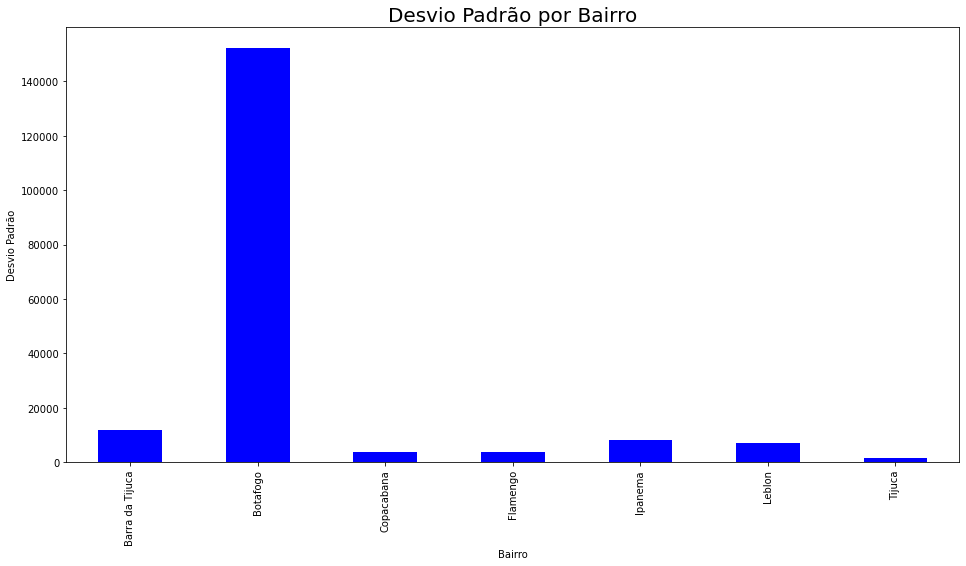

In [109]:
# notamos um problema no desvio padrão de Botafogo
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Desvio Padrão')
fig.set_title('Desvio Padrão por Bairro', {'fontsize': 20})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

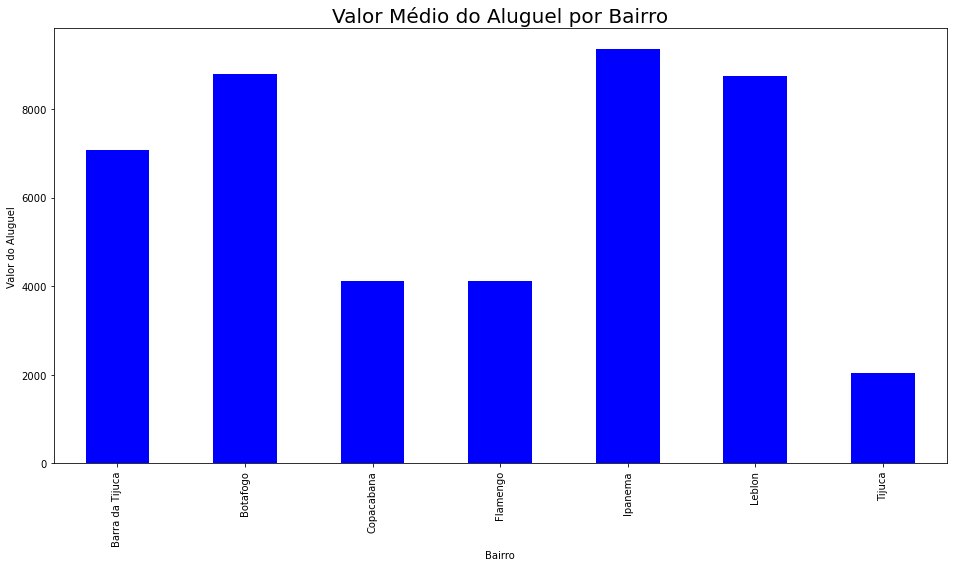

In [108]:
# média
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 20})

Text(0.5, 1.0, 'Mediana por Bairro')

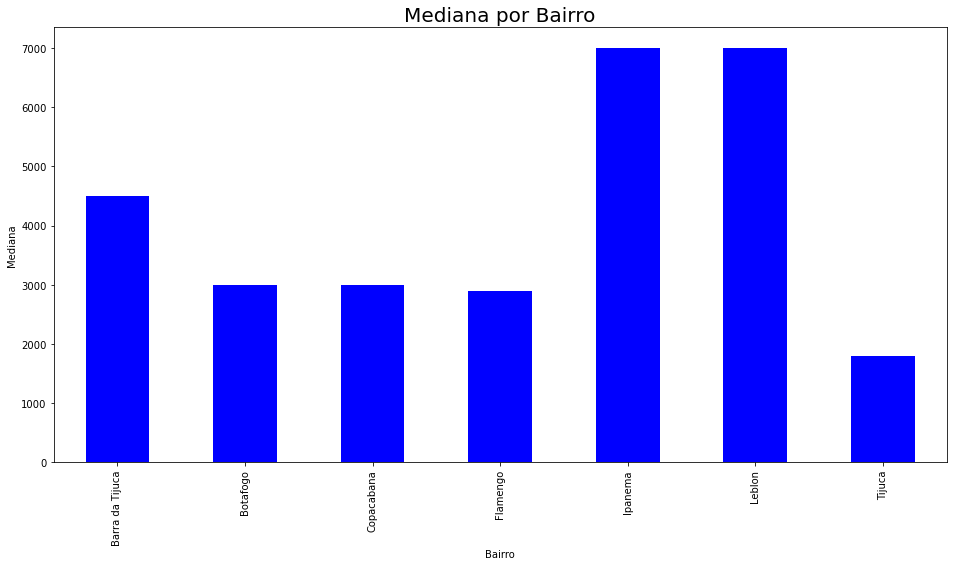

In [110]:
# mediana
fig = grupo_bairro['Valor'].median().plot.bar(color = 'blue')
fig.set_ylabel('Mediana')
fig.set_title('Mediana por Bairro', {'fontsize': 20})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

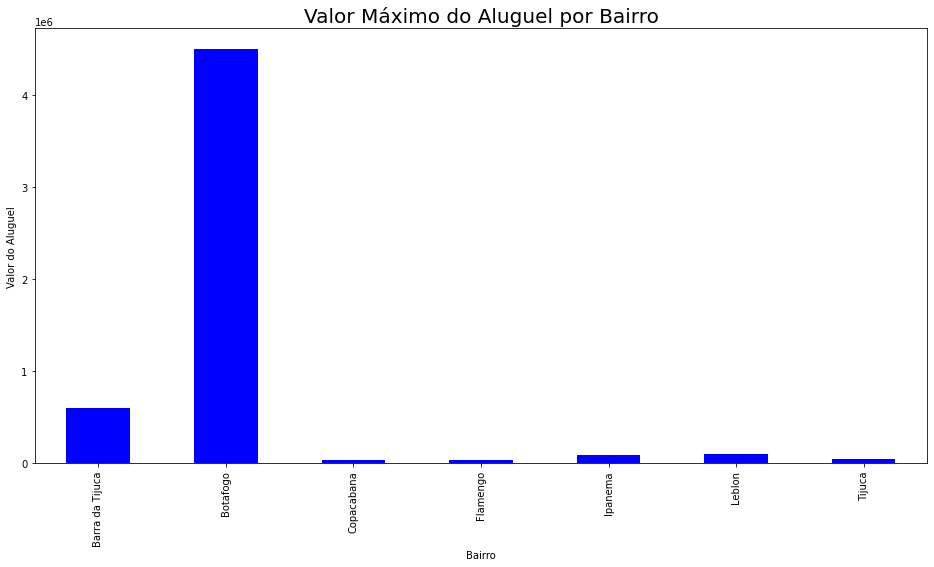

In [111]:
# máximo
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 20})